In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [370]:
def print_simple_number(truth_table,object_type):
    total_N = len(truth_table)
    good_N = len(truth_table[truth_table['best_quality']>=2.5])
    very_good_N = len(truth_table[truth_table['best_quality']==4])
    print('Number of',object_type,':',total_N)
    print('Number of ',object_type,'with quality>=2.5:',good_N, ' | fration=',good_N*1.0/total_N)
    print('Number of ',object_type,'with quality==4:',very_good_N, ' | fration=',very_good_N*1.0/total_N)
    tmp_table = truth_table.loc[truth_table['best_quality']>=2.5]
    number_star = len(tmp_table.loc[tmp_table['best_spectype']=='STAR'])
    number_galaxy = len(tmp_table.loc[tmp_table['best_spectype']=='GALAXY'])
    number_qso = len(tmp_table.loc[tmp_table['best_spectype']=='QSO'])
    print('---------')  
    print('Fraction of objects with quality>=2.5')
    print('Star:',number_star*1.0/good_N)
    print('Galaxy:',number_galaxy*1.0/good_N)    
    print('QSO:',number_qso*1.0/good_N)

    plt.hist(truth_table['best_quality'],bins=8,range=(0,4))
    plt.ylabel('Number')
    plt.xlabel('Quality')
    plt.yscale('log')
    plt.xlim(0,4)
  

In [371]:
def plot_redshift_distribution(truth_table,object_type):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    x_range = [0,max(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'])]
    plt.hist(truth_table['best_z'],range=(x_range[0],x_range[1]),bins=20,color='b',label='All')
    plt.hist(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='orange',label='quality>=2.5')
    plt.hist(truth_table.loc[truth_table['best_quality']==4]['best_z'],range=(x_range[0],x_range[1]),bins=20,color='g',label='quality=4')
    plt.yscale('log')
    plt.xlabel('Best z')
    plt.ylabel('Number')
    plt.legend()
    plt.title(object_type)
    
    plt.subplot(1,2,2)
    plt.scatter(truth_table.loc[truth_table['best_quality']>=2.5]['best_z'],truth_table.loc[truth_table['best_quality']>=2.5]['Redrock_z'],
                
                c=truth_table.loc[truth_table['best_quality']>=2.5]['best_quality'],cmap=cm.jet)
    plt.xlabel('Best z')
    plt.ylabel('Redrock z')
    plt.colorbar()

In [372]:
def plot_chi2_quality_distribution(truth_table):
    #plt.scatter(truth_table['best_quality'],truth_table['DELTACHI2'])
    #plt.ylim(1,100000)
    #plt.yscale('log')
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.hist(np.log10(truth_table['DELTACHI2']),label='All',bins=8,range=(0,5),color='b')
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5))
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),)
    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()
    plt.subplot(1,2,2)
    
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']<2.5]['DELTACHI2']),color='grey',label='flag<2.5',bins=8,range=(0,5),histtype='step',lw=4)
    plt.hist(np.log10(truth_table.loc[truth_table['best_quality']>=2.5]['DELTACHI2']),color='orange',label='flag>=2.5',bins=8,range=(0,5),histtype='step',lw=4)
    #plt.hist(np.log10(truth_table.loc[truth_table['best_quality']==4]['DELTACHI2']),color='g',label='flag=4',bins=8,range=(0,5),histtype='step',lw=4)

    plt.xlabel('$log_{10}$ delta chi$^{2}$')
    plt.ylabel('Number')
    plt.yscale('log')
    plt.legend()    
    
    
    
    

In [373]:
def give_me_ra_dec_object_with_property_cut(truth_table, property_name, cut, if_print=True):
    tmp_table = truth_table.loc[(truth_table[property_name]>=cut[0]) & (truth_table[property_name]<cut[1])]
    if if_print==True:
        for i_object in range(0,len(tmp_table)):
            print(tmp_table['TARGET_RA'].values[i_object],tmp_table['TARGET_DEC'].values[i_object])
    
    return tmp_table

In [405]:
# The filenames are tentative. We will change the filenames.
on_nersc=False
if on_nersc==True:
    dir = '/global/cfs/cdirs/desi/sv/vi/TruthTables/Blanc/'
    BGS = pd.read_csv(dir+'BGS/'+'desi-vi_BGS_tile80613_nightdeep_merged_all_210202.csv')
    LRG = pd.read_csv(dir+'LRG'/+'desi-vi_LRG_tile80609_nightdeep_merged_all_210130.csv')
    ELG = pd.read_csv(dir+'ELG/'+'desi-vi_ELG_tile80608_nightdeep_merged_all_210203.csv')
else:
    BGS = pd.read_csv('desi-vi_BGS_tile80613_nightdeep_merged_all_210202.csv')
    LRG = pd.read_csv('desi-vi_LRG_tile80609_nightdeep_merged_all_210130.csv')
    ELG = pd.read_csv('desi-vi_ELG_tile80608_nightdeep_merged_all_210203.csv')
    #QSO = pd.read_csv('desi-vi_QSO_tile80609_nightdeep_merged_all_210202_ADDING_object_info.csv')

In [400]:
BGS

,TARGETID,Redrock_z,best_z,best_quality,Redrock_spectype,best_spectype,all_VI_issues,all_VI_comments,merger_comment,N_VI,...,TARGET_DEC,FIBER,FLUX_G,FLUX_R,FLUX_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,EBV,TILEID
0,39633324636897596,0.2880,0.28800,4.0,GALAXY,GALAXY,NaN,NaN,none,2,...,55.345018,619,3.366205,7.631032,14.599298,0.882182,1.999865,3.826039,0.054687,80613
1,39633324636897900,0.1090,0.10900,4.0,GALAXY,GALAXY,NaN,NaN,none,2,...,55.242984,985,65.715150,113.857550,180.402400,6.576893,11.395073,18.055004,0.054657,80613
2,39633324636898115,0.1273,0.12730,4.0,GALAXY,GALAXY,S,R-IR splice fail,none,2,...,55.263103,988,15.698056,24.697529,36.447792,2.514190,3.955538,5.837452,0.054854,80613
3,39633324636898140,0.1674,0.16740,4.0,GALAXY,GALAXY,NaN,NaN,none,2,...,55.318593,984,2.711625,5.758605,10.227657,0.991317,2.105234,3.739033,0.054448,80613
4,39633324636898167,0.1576,0.15760,4.0,GALAXY,GALAXY,NaN,NaN,Prospect problen,2,...,55.374364,649,9.651263,26.034315,54.615532,3.169319,8.549250,17.934862,0.054313,80613
5,39633324636898678,0.2888,0.28880,1.0,GALAXY,GALAXY,S,Blue discontinuity,No obvious features,2,...,55.175223,144,12.538161,20.345884,25.949532,0.661542,1.073495,1.369157,0.054057,80613
6,39633324636899096,0.2877,0.28770,4.0,GALAXY,GALAXY,NaN,NaN,none,2,...,55.133243,140,6.638117,26.562456,58.903336,2.194114,8.779758,19.469471,0.053291,80613
7,39633324636899188,0.3801,0.38010,4.0,GALAXY,GALAXY,NaN,NaN,none,2,...,55.241474,128,2.627020,11.736599,30.650692,0.716744,3.202158,8.362590,0.055234,80613
8,39633324636899668,0.4720,0.47200,3.5,GALAXY,GALAXY,NaN,NaN,none,2,...,55.137385,112,1.049345,6.254590,18.733067,0.408073,2.432303,7.284970,0.053771,80613
9,39633324636899698,0.1293,0.12930,4.0,GALAXY,GALAXY,NaN,Messy continuum. Reduction failure?,none,2,...,55.281941,120,5.312858,8.512977,10.664305,1.258017,2.015764,2.525171,0.055465,80613


# BGS

Number of BGS : 2718
Number of  BGS with quality>=2.5: 2593  | fration= 0.9540103016924208
Number of  BGS with quality==4: 2418  | fration= 0.8896247240618101
---------
Fraction of objects with quality>=2.5
Star: 0.0775163902815272
Galaxy: 0.9132279213266487
QSO: 0.009255688391824142


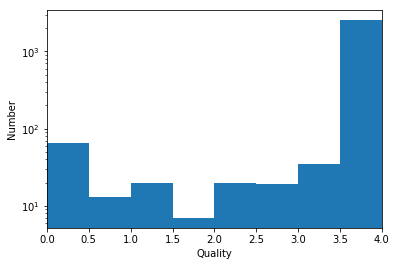

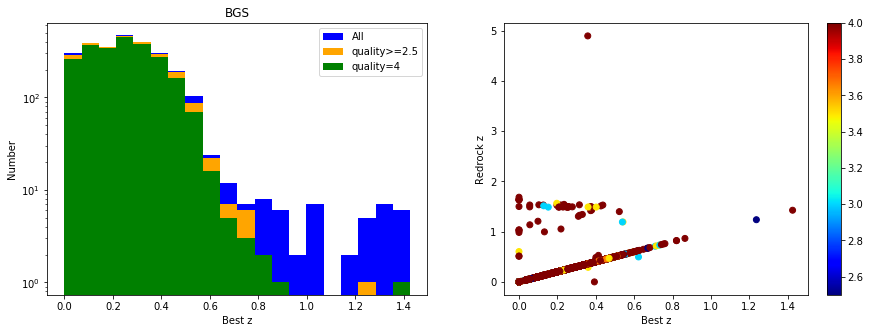

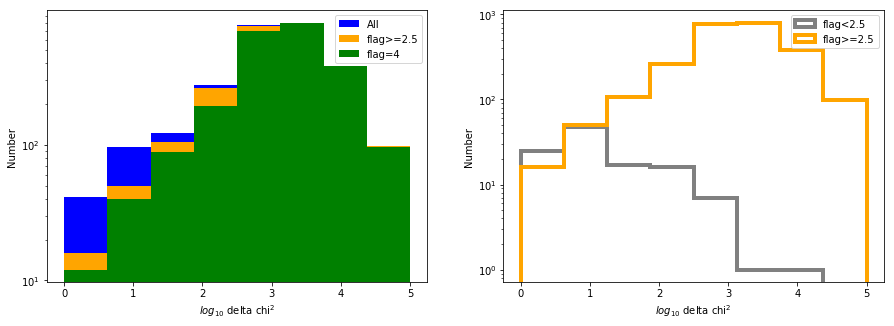

In [396]:
print_simple_number(BGS,'BGS')
plot_redshift_distribution(BGS,'BGS')
plot_chi2_quality_distribution(BGS)

In [410]:
cut_table= give_me_ra_dec_object_with_property_cut(BGS,'best_quality',[0,1],True)
len(cut_table)

106.45306592522522 55.136235559652796
108.00732267473629 55.718758677455924
105.291853754265 56.155702906810596
104.98074446774277 56.50594450452317
105.0618112614052 56.43738692736025
105.33551550145216 56.51583343937135
105.41792274656471 56.4529518890321
104.149177472165 55.63612896829832
104.5282675391658 55.63706713318856
106.76987912789959 57.17529672747828
108.28579954207191 57.42129723537518
108.22222195746521 55.78356368448972
104.49158003222908 55.44188773229085
104.83452953381956 55.594674667724455
107.42483917523847 57.154813292685226
107.84975655013136 57.29964136303368
108.17271273513592 57.01017700172555
108.42942434127123 56.88736945725554
106.36436237500062 55.722346746306286
106.65370375269433 55.73913279564658
106.96158529391704 55.83827359686838
105.478059931314 55.74028329493196
105.54874782982893 55.81873437626282
108.53462290215728 55.92777446724102
107.48738698126827 56.58567791230441
107.4994380046809 56.377692995730676
108.15448150964308 55.252183650448615
108

78

# LRG

Number of LRG : 1789
Number of  LRG with quality>=2.5: 1747  | fration= 0.9765231973169368
Number of  LRG with quality==4: 1544  | fration= 0.8630519843487983
---------
Fraction of objects with quality>=2.5
Star: 0.008586147681740127
Galaxy: 0.9753863766456783
QSO: 0.01602747567258157


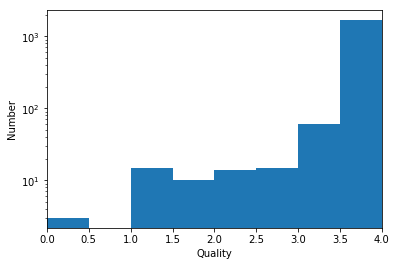

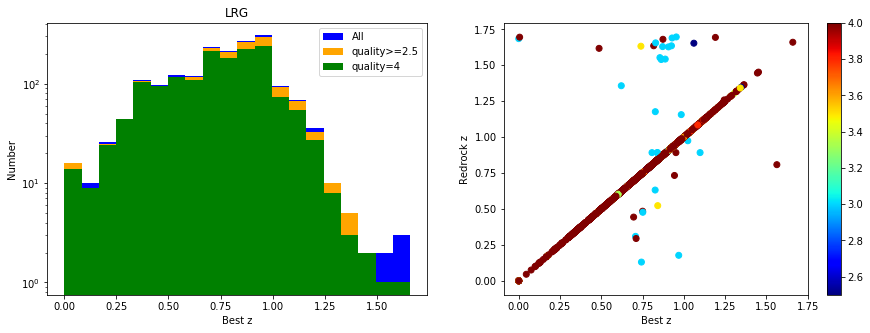

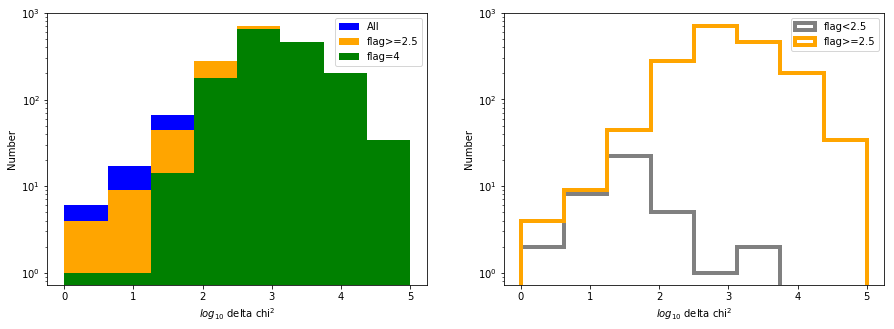

In [378]:
print_simple_number(LRG,'LRG')
plot_redshift_distribution(LRG,'LRG')
plot_chi2_quality_distribution(LRG)

cut_table= give_me_ra_dec_object_with_property_cut(LRG,'best_quality',[0,2],False)
len(cut_table)

# ELG

Number of ELG : 3380
Number of  ELG with quality>=2.5: 2479  | fration= 0.7334319526627219
Number of  ELG with quality==4: 1828  | fration= 0.5408284023668639
---------
Fraction of objects with quality>=2.5
Star: 0.01734570391286809
Galaxy: 0.9495764421137556
QSO: 0.03307785397337636


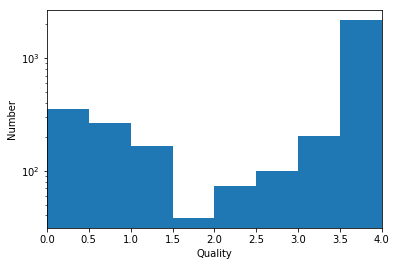

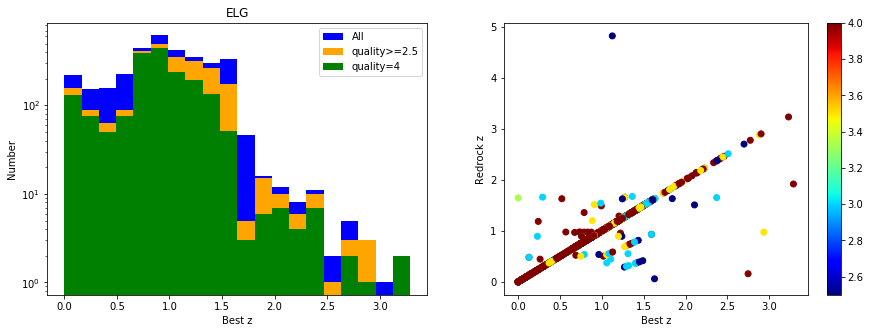

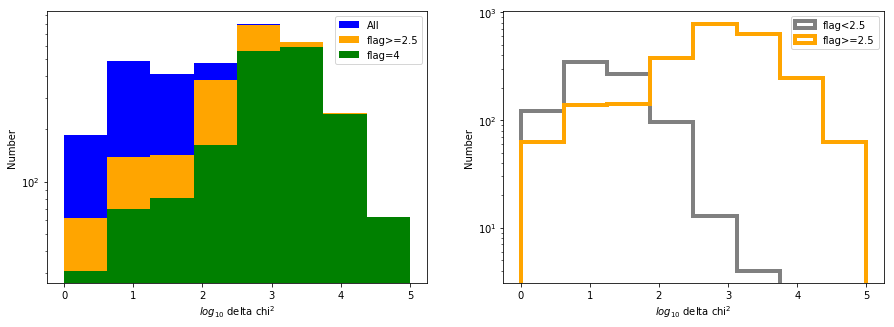

In [387]:
#ELG = pd.read_csv('desi-vi_ELG_tile80608_nightdeep_merged_all_210203.csv')
#ELG = ELG[ELG['best_spectype']=='GALAXY']
print_simple_number(ELG,'ELG')
plot_redshift_distribution(ELG,'ELG')
plot_chi2_quality_distribution(ELG)

In [445]:
def plot_main_selection():
    x_gt_08 = np.arange(0.85,1.6,0.01)
    plt.plot(x_gt_08,1.6-1.2*x_gt_08,color='black',ls='--',lw=3)
    x_lt_08 = np.arange(0.3,0.85,0.01)
    plt.plot(x_lt_08,1.15*x_lt_08-0.35,color='black',ls='--',lw=3)
    plt.plot([0.3,0.3],[-0.5,0.0],color='black',ls='--',lw=3)
    plt.plot([1.6,1.6],[-0.5,-0.32],color='black',ls='--',lw=3)
    plt.plot([0.3,1.6],[-0.5,-0.5],color='black',ls='--',lw=3)

In [447]:
def select_ELG_main_selection(truth_table):
    g = -2.5*np.log10(truth_table['FLUX_G'])+22.5-3.214*truth_table['EBV']
    r = -2.5*np.log10(truth_table['FLUX_R'])+22.5-2.165*truth_table['EBV']
    z = -2.5*np.log10(truth_table['FLUX_Z'])+22.5-1.211*truth_table['EBV']
    gr_color = g-r
    rz_color = r-z
    coii = gr_color + 1.2*rz_color
    
    main_ELG = truth_table[(g>20) & (g<23.6) & (rz_color>0.3) & (rz_color<1.6) &(gr_color<1.15*rz_color-0.35) & (gr_color<-1.2*rz_color+1.6) & (gr_color>-0.5)]
    return main_ELG

In [428]:
g = -2.5*np.log10(ELG['FLUX_G'])+22.5-3.214*ELG['EBV']
r = -2.5*np.log10(ELG['FLUX_R'])+22.5-2.165*ELG['EBV']
z = -2.5*np.log10(ELG['FLUX_Z'])+22.5-1.211*ELG['EBV']
gr_color = g-r
rz_color = r-z
coii = gr_color + 1.2*rz_color

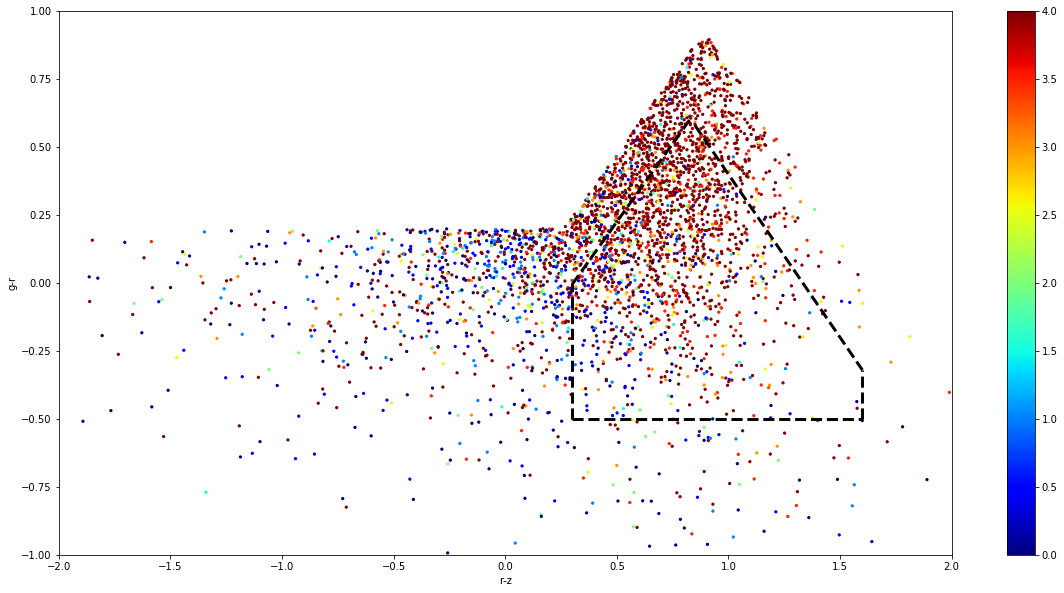

In [446]:
plt.figure(figsize=(20,10))
plt.scatter(rz_color,gr_color,s=5,c=ELG['best_quality'],cmap=cm.jet,vmax=4,vmin=0)
plt.xlim(-2,2)
plt.ylim(-1,1)
plt.colorbar()
plt.xlabel('r-z')
plt.ylabel('g-r')
plot_main_selection()

# Main ELG

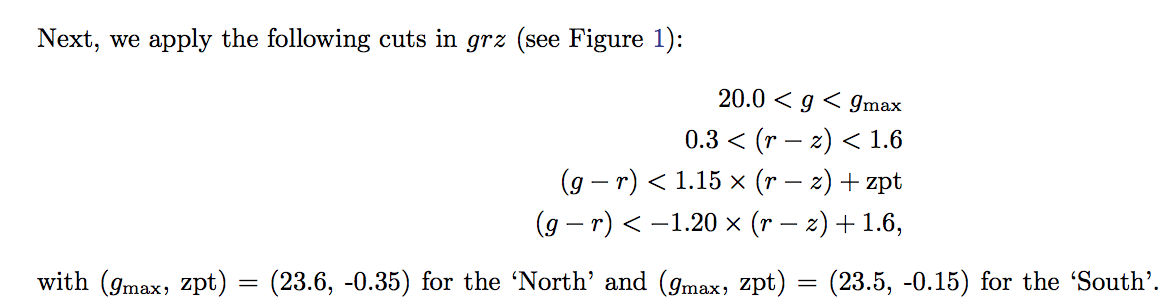

In [448]:
main_ELG = select_ELG_main_selection(ELG)

Main selection fraction: 0.29467455621301775
Number of main_ELG : 996
Number of  main_ELG with quality>=2.5: 847  | fration= 0.8504016064257028
Number of  main_ELG with quality==4: 613  | fration= 0.6154618473895582
---------
Fraction of objects with quality>=2.5
Star: 0.0011806375442739079
Galaxy: 0.9681227863046045
QSO: 0.030696576151121605


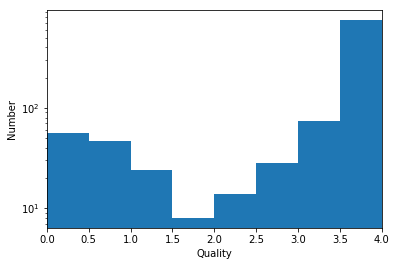

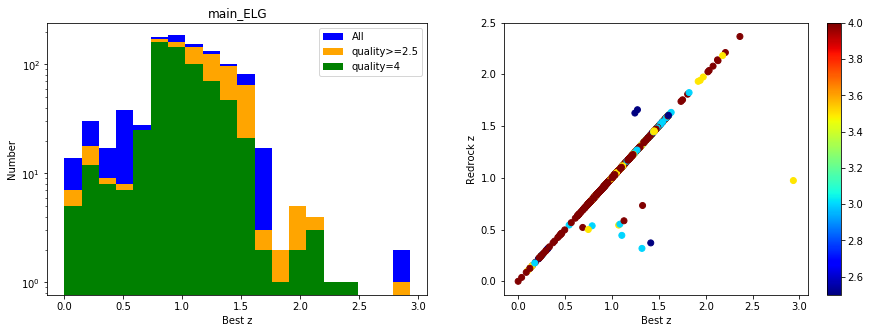

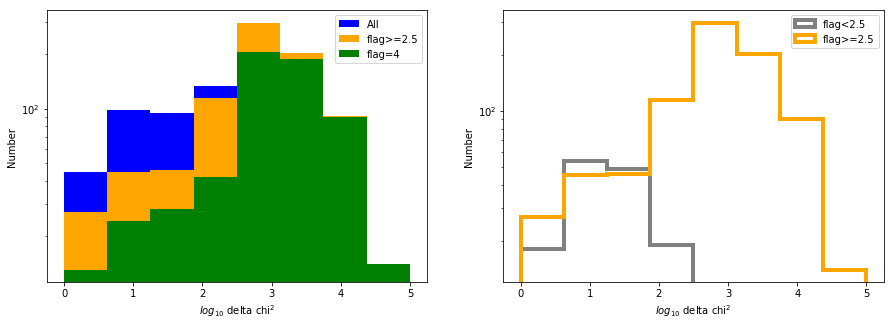

In [449]:
print('Main selection fraction:',len(main_ELG)*1.0/len(ELG))
print_simple_number(main_ELG,'main_ELG')
plot_redshift_distribution(main_ELG,'main_ELG')
plot_chi2_quality_distribution(main_ELG)
